<a href="https://colab.research.google.com/github/OmarKamal11/Bondora/blob/main/Copy_of_Bondora_peer_to_peer_lending.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bondora Data Preprocessing 

In this project we will be doing credit risk modelling of peer to peer lending Bondora systems.Data for the study has been retrieved from a publicly available data set of a leading European P2P lending platform  ([**Bondora**](https://www.bondora.com/en/public-reports#dataset-file-format)).The retrieved data is a pool of both defaulted and non-defaulted loans from the time period between **1st March 2009** and **27th January 2020**. The data
comprises of demographic and financial information of borrowers, and loan transactions.In P2P lending, loans are typically uncollateralized and lenders seek higher returns as a compensation for the financial risk they take. In addition, they need to make decisions under information asymmetry that works in favor of the borrowers. In order to make rational decisions, lenders want to minimize the risk of default of each lending decision, and realize the return that compensates for the risk.

In this notebook we will preprocess the raw dataset and will create new preprocessed csv that can be used for building credit risk models.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Bondora_raw.csv',low_memory=False)

# **Data Exploration**

In [3]:
df.head(1)

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,NrOfDependants,EmploymentStatus,EmploymentDurationCurrentEmployer,EmploymentPosition,WorkExperience,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedPrincipalTillDate,PlannedInterestTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,DefaultDate,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,StageActiveSince,ModelVersion,Rating,EL_V0,Rating_V0,EL_V1,Rating_V1,Rating_V2,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.041,KARU,True,2009-06-11 16:40:39,2009-06-16,2010-07-06,2009-07-27,2010-06-25,2010-06-25,17,5,2.0,1,61,1947-11-26,1.0,EE,319.5582,115.0408,30.0,12,NaN,HARJU,TALLINN,7,3.0,1.0,0,3.0,UpTo3Years,klienditeenindaja,MoreThan25Years,7.0,NaN,6000.0,0.0,0.0,0.0,0.0,0.0,4500.0,10500.0,0,0.0,0,0.0,0.0,25,True,1800.0,319.08,2010-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,91-120,NaN,NaN,NaN,NaN,115.0408,20.4222,0.0,0.0,0.0,0.0,1,83.0852,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN


In [4]:
df.describe()

,LoanNumber,BidsPortfolioManager,BidsApi,BidsManual,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,Gender,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,PlannedPrincipalTillDate,PlannedInterestTillDate,CurrentDebtDaysPrimary,CurrentDebtDaysSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,ModelVersion,EL_V0,EL_V1,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost
count,1.345290e+05,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,134484.000000,134529.000000,134529.000000,134484.000000,134529.000000,134529.000000,134529.000000,134529.000000,127844.000000,134529.000000,134484.000000,134484.000000,134332.000000,134443.000000,132877.000000,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,1.345290e+05,134529.000000,1.345290e+05,134529.000000,134484.000000,134484.000000,134529.000000,54459.000000,130587.000000,48518.000000,52250.000000,131893.000000,131893.000000,131893.000000,131893.000000,119692.000000,42915.000000,42915.000000,42915.000000,42915.000000,42915.000000,42915.000000,77241.000000,131893.000000,4569.000000,12922.000000,71722.00000,134529.000000,134529.000000,59129.000000,59129.000000,134529.000000,134529.000000,134529.000000,134529.000000,91368.000000,58026.000000,134529.000000,97788.000000,97788.000000,59129.000000,59129.000000
mean,9.449392e+05,966.452876,29.111664,559.332590,13.374640,3.907908,2.817257,2.827874,40.819295,0.442097,2727.947540,2543.872472,35.889583,46.151573,119.083443,0.343026,3.680713,-0.109165,0.153716,1.381708,3.357511,437.143384,18.802698,5.682848,2.390005,3.253239,2.359142,43.112825,1.724150e+03,3.181797,5.620270e+02,0.187313,7.769024,122.239119,11.143188,994.558014,708.883798,593.448019,612.733053,0.149255,0.409065,0.136558,0.252434,232.959918,849.838695,1099.982243,2351.471556,1909.285140,336.213893,15.150365,1.473440,4.718408,0.192519,0.186687,952.37584,761.476162,488.397102,24.574728,86.820368,1769.281104,701.567107,1.487620,2868.652401,928.395548,320.743805,0.069903,5.178795,50.126795,5.264702,89.851455
std,4.786738e+05,1355.686016,150.159148,750.360512,4.992375,1.726192,1.407908,1.959802,12.348693,0.636083,2374.439168,2170.128183,26.288644,15.202688,114.737919,3.311925,1.174134,1.555404,1.940581,4.880079,2.844225,1786.569939,150.849487,38.385899,36.791193,77.523767,28.459953,459.081430,4.970166e+03,3.424242,3.383163e+04,0.896455,16.259688,692.480442,7.044104,1654.973527,1276.371901,569.495276,607.882018,0.119853,0.314768,0.075794,0.149629,721.414596,1271.781752,1514.736356,2084.825355,1939.821339,825.994549,177.149905,0.499297,1.883788,0.187765,0.170862,102.71751,1371.557801,827.805133,243.837975,781.437462,2030.546309,2514.595572,2.396148,4507.046575,2042.348751,1561.799076,0.359461,7.674427,12.519530,57.800582,287.449052
min,3.700000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,31.955800,6.390000,3.000000,1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0000

In [5]:
df.shape

(134529, 112)

In [6]:
df.columns

Index(['ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC',
       'BiddingStartedOn', 'BidsPortfolioManager', 'BidsApi', 'BidsManual',
       'UserName', 'NewCreditCustomer',
       ...
       'PreviousEarlyRepaymentsCountBeforeLoan', 'GracePeriodStart',
       'GracePeriodEnd', 'NextPaymentDate', 'NextPaymentNr',
       'NrOfScheduledPayments', 'ReScheduledOn', 'PrincipalDebtServicingCost',
       'InterestAndPenaltyDebtServicingCost', 'ActiveLateLastPaymentCategory'],
      dtype='object', length=112)

In [7]:
low_cardinality_cols = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique()<=5]
low_cardinality_cols

['ReportAsOfEOD', 'Country', 'Status']

In [8]:
cols_with_missing = [col for col in df.columns if df[col].isnull().any()>0]
cols_with_missing

['ContractEndDate',
 'VerificationType',
 'Gender',
 'MonthlyPayment',
 'County',
 'City',
 'Education',
 'MaritalStatus',
 'NrOfDependants',
 'EmploymentStatus',
 'EmploymentDurationCurrentEmployer',
 'EmploymentPosition',
 'WorkExperience',
 'OccupationArea',
 'HomeOwnershipType',
 'DebtToIncome',
 'FreeCash',
 'PlannedPrincipalTillDate',
 'PlannedInterestTillDate',
 'LastPaymentOn',
 'CurrentDebtDaysPrimary',
 'DebtOccuredOn',
 'CurrentDebtDaysSecondary',
 'DebtOccuredOnForSecondary',
 'ExpectedLoss',
 'LossGivenDefault',
 'ExpectedReturn',
 'ProbabilityOfDefault',
 'DefaultDate',
 'PrincipalOverdueBySchedule',
 'PlannedPrincipalPostDefault',
 'PlannedInterestPostDefault',
 'EAD1',
 'EAD2',
 'PrincipalRecovery',
 'InterestRecovery',
 'RecoveryStage',
 'StageActiveSince',
 'ModelVersion',
 'Rating',
 'EL_V0',
 'Rating_V0',
 'EL_V1',
 'Rating_V1',
 'Rating_V2',
 'ActiveLateCategory',
 'WorseLateCategory',
 'CreditScoreEsMicroL',
 'CreditScoreEsEquifaxRisk',
 'CreditScoreFiAsiakasTieto

## Data Understanding

| Feature                                | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
|----------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ActiveLateCategory                     | When a loan is in Principal Debt then it will be categorized by Principal Debt days                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| ActiveLateLastPaymentCategory          | Shows how many days has passed since last payment and categorised if it is overdue                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| ActiveScheduleFirstPaymentReached      | Whether the first payment date has been reached according to the active schedule                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| Age                                    | The age of the borrower when signing the loan application                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| Amount                                 | Amount the borrower received on the Primary Market. This is the principal balance of your purchase from Secondary Market                                                                                                                                                                                                                                                                                                                                                                                            |
| AmountOfPreviousLoansBeforeLoan        | Value of previous loans                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| AppliedAmount                          | The amount borrower applied for originally                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| AuctionBidNumber                       | Unique bid number which is accompanied by Auction number                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| AuctionId                              | A unique number given to all auctions                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| AuctionName                            | Name of the Auction, in newer loans it is defined by the purpose of the loan                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| AuctionNumber                          | Unique auction number which is accompanied by Bid number                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| BidPrincipal                           | On Primary Market BidPrincipal is the amount you made your bid on. On Secondary Market BidPrincipal is the purchase price                                                                                                                                                                                                                                                                                                                                                                                           |
| BidsApi                                | The amount of investment offers made via Api                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| BidsManual                             | The amount of investment offers made manually                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| BidsPortfolioManager                   | The amount of investment offers made by Portfolio Managers                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| BoughtFromResale_Date                  | The time when the investment was purchased from the Secondary Market                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| City                                   | City of the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| ContractEndDate                        | The date when the loan contract ended                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| Country                                | Residency of the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| County                                 | County of the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| CreditScoreEeMini                      | 1000 No previous payments problems 900 Payments problems finished 24-36 months ago 800 Payments problems finished 12-24 months ago 700 Payments problems finished 6-12 months ago 600 Payment problems finished < 6 months ago 500 Active payment problems                                                                                                                                                                                                                                                          |
| CreditScoreEsEquifaxRisk               | Generic score for the loan applicants that do not have active past due operations in ASNEF; a measure of the probability of default one year ahead; the score is given on a 6-grade scale: AAA (“Very low”), AA (“Low”), A (“Average”), B (“Average High”), C (“High”), D (“Very High”).                                                                                                                                                                                                                            |
| CreditScoreEsMicroL                    | A score that is specifically designed for risk classifying subprime borrowers (defined by Equifax as borrowers that do not have access to bank loans); a measure of the probability of default one month ahead; the score is given on a 10-grade scale, from the best score to the worst: M1, M2, M3, M4, M5, M6, M7, M8, M9, M10.                                                                                                                                                                                  |
| CreditScoreFiAsiakasTietoRiskGrade     | Credit Scoring model for Finnish Asiakastieto RL1 Very low risk 01-20 RL2 Low risk 21-40 RL3 Average risk 41-60 RL4 Big risk 61-80 RL5 Huge risk 81-100                                                                                                                                                                                                                                                                                                                                                             |
| CurrentDebtDaysPrimary                 | How long the loan has been in Principal Debt                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| CurrentDebtDaysSecondary               | How long the loan has been in Interest Debt                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| DateOfBirth                            | The date of the borrower's birth                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| DebtOccuredOn                          | The date when Principal Debt occurred                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| DebtOccuredOnForSecondary              | The date when Interest Debt occurred                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| DebtToIncome                           | Ratio of borrower's monthly gross income that goes toward paying loans                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| DefaultDate                            | The date when loan went into defaulted state and collection process was started                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| DesiredDiscountRate                    | Investment being sold at a discount or premium                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| EAD1                                   | Exposure at default, outstanding principal at default                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| EAD2                                   | Exposure at default, loan amount less all payments prior to default                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| Education                              | 1 Primary education 2 Basic education 3 Vocational education 4 Secondary education 5 Higher education                                                                                                                                                                                                                                                                                                                                                                                                               |
| EL_V0                                  | Expected loss calculated by the specified version of Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| EL_V1                                  | Expected loss calculated by the specified version of Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| EL_V2                                  | Expected loss calculated by the specified version of Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| EmploymentDurationCurrentEmployer      | Employment time with the current employer                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| EmploymentPosition                     | Employment position with the current employer                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| EmploymentStatus                       | 1 Unemployed 2 Partially employed 3 Fully employed 4 Self-employed 5 Entrepreneur 6 Retiree                                                                                                                                                                                                                                                                                                                                                                                                                         |
| ExistingLiabilities                    | Borrower's number of existing liabilities                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| ExpectedLoss                           | Expected Loss calculated by the current Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| ExpectedReturn                         | Expected Return calculated by the current Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| FirstPaymentDate                       | First payment date according to initial loan schedule                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| FreeCash                               | Discretionary income after monthly liabilities                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| Gender                                 | 0 Male 1 Woman 2 Undefined                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| GracePeriodEnd                         | Date of the end of Grace period                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| GracePeriodStart                       | Date of the beginning of Grace period                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| HomeOwnershipType                      | 0 Homeless 1 Owner 2 Living with parents 3 Tenant, pre-furnished property 4 Tenant, unfurnished property 5 Council house 6 Joint tenant 7 Joint ownership 8 Mortgage 9 Owner with encumbrance 10 Other                                                                                                                                                                                                                                                                                                              |
| IncomeFromChildSupport                 | Borrower's income from alimony payments                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| IncomeFromFamilyAllowance              | Borrower's income from child support                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| IncomeFromLeavePay                     | Borrower's income from paternity leave                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| IncomeFromPension                      | Borrower's income from pension                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| IncomeFromPrincipalEmployer            | Borrower's income from its employer                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| IncomeFromSocialWelfare                | Borrower's income from social support                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| IncomeOther                            | Borrower's income from other sources                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| IncomeTotal                            | Borrower's total income                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| Interest                               | Maximum interest rate accepted in the loan application                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| InterestAndPenaltyBalance              | Unpaid interest and penalties                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| InterestAndPenaltyDebtServicingCost    | Service cost related to the recovery of the debt based on the interest and penalties of the investment                                                                                                                                                                                                                                                                                                                                                                                                              |
| InterestAndPenaltyPaymentsMade         | Note owner received loan transfers earned interest, penalties total amount                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| InterestAndPenaltyWriteOffs            | Interest that was written off on the investment                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| InterestLateAmount                     | Interest debt amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| InterestRecovery                       | Interest recovered due to collection process from in debt loans                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| LanguageCode                           | 1 Estonian 2 English 3 Russian 4 Finnish 5 German 6 Spanish 9 Slovakian                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| LastPaymentOn                          | The date of the current last payment received from the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| LiabilitiesTotal                       | Total monthly liabilities                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| ListedOnUTC                            | Date when the loan application appeared on Primary Market                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| LoanDate                               | Date when the loan was issued                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| LoanDuration                           | Current loan duration in months                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| LoanId                                 | A unique ID given to all loan applications                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| LoanNumber                             | A unique number given to all loan applications                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| LoanStatusActiveFrom                   | How long the current status has been active                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| LossGivenDefault                       | Gives the percentage of outstanding exposure at the time of default that an investor is likely to lose if a loan actually defaults. This means the proportion of funds lost for the investor after all expected recovery and accounting for the time value of the money recovered. In general, LGD parameter is intended to be estimated based on the historical recoveries. However, in new markets where limited experience does not allow us more precise loss given default estimates, a LGD of 90% is assumed. |
| MaritalStatus                          | 1 Married 2 Cohabitant 3 Single 4 Divorced 5 Widow                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| MaturityDate_Last                      | Loan maturity date according to the current payment schedule                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| MaturityDate_Original                  | Loan maturity date according to the original loan schedule                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| ModelVersion                           | The version of the Rating model used for issuing the Bondora Rating                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| MonthlyPayment                         | Estimated amount the borrower has to pay every month                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| MonthlyPaymentDay                      | The day of the month the loan payments are scheduled for The actual date is adjusted for weekends and bank holidays (e.g. if 10th is Sunday then the payment will be made on the 11th in that month)                                                                                                                                                                                                                                                                                                                |
| NewCreditCustomer                      | Did the customer have prior credit history in Bondora 0 Customer had at least 3 months of credit history in Bondora 1 No prior credit history in Bondora                                                                                                                                                                                                                                                                                                                                                            |
| NextPaymentDate                        | According to schedule the next date for borrower to make their payment                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| NextPaymentNr                          | According to schedule the number of the next payment                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| NextPaymentSum                         | According to schedule the amount of the next payment                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| NoOfPreviousLoansBeforeLoan            | Number of previous loans                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| note_id                                | A unique ID given to the investments                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| NoteLoanLateChargesPaid                | The amount of late charges the note has received                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| NoteLoanTransfersInterestAmount        | The amount of interest the note has received                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| NoteLoanTransfersMainAmount            | The amount of principal the note has received                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| NrOfDependants                         | Number of children or other dependants                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| NrOfScheduledPayments                  | According to schedule the count of scheduled payments                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| OccupationArea                         | 1 Other 2 Mining 3 Processing 4 Energy 5 Utilities 6 Construction 7 Retail and wholesale 8 Transport and warehousing 9 Hospitality and catering 10 Info and telecom 11 Finance and insurance 12 Real-estate 13 Research 14 Administrative 15 Civil service & military 16 Education 17 Healthcare and social help 18 Art and entertainment 19 Agriculture, forestry and fishing                                                                                                                                      |
| OnSaleSince                            | Time when the investment was added to Secondary Market                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| PenaltyLateAmount                      | Late charges debt amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| PlannedInterestPostDefault             | The amount of interest that was planned to be received after the default occurred                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| PlannedInterestTillDate                | According to active schedule the amount of interest the investment should have received                                                                                                                                                                                                                                                                                                                                                                                                                             |
| PlannedPrincipalPostDefault            | The amount of principal that was planned to be received after the default occurred                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| PlannedPrincipalTillDate               | According to active schedule the amount of principal the investment should have received                                                                                                                                                                                                                                                                                                                                                                                                                            |
| PreviousEarlyRepaymentsBeforeLoan      | How much was the early repayment amount before the loan                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| PreviousEarlyRepaymentsCountBeforeLoan | How many times the borrower had repaid early                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| PreviousRepaymentsBeforeLoan           | How much the borrower had repaid before the loan                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| PrincipalBalance                       | Principal that still needs to be paid by the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| PrincipalDebtServicingCost             | Service cost related to the recovery of the debt based on the principal of the investment                                                                                                                                                                                                                                                                                                                                                                                                                           |
| PrincipalLateAmount                    | Principal debt amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| PrincipalOverdueBySchedule             | According to the current schedule, principal that is overdue                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| PrincipalPaymentsMade                  | Note owner received loan transfers principal amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| PrincipalRecovery                      | Principal recovered due to collection process from in debt loans                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| PrincipalWriteOffs                     | Principal that was written off on the investment                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| ProbabilityOfDefault                   | Probability of Default, refers to a loan’s probability of default within one year horizon.                                                                                                                                                                                                                                                                                                                                                                                                                          |
| PurchasePrice                          | Investment amount or secondary market purchase price                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| Rating                                 | Bondora Rating issued by the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| Rating_V0                              | Bondora Rating issued by version 0 of the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| Rating_V1                              | Bondora Rating issued by version 1 of the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| Rating_V2                              | Bondora Rating issued by version 2 of the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| RecoveryStage                          | Current stage according to the recovery model 1 Collection 2 Recovery 3 Write Off                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| RefinanceLiabilities                   | The total amount of liabilities after refinancing                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| ReScheduledOn                          | The date when the a new schedule was assigned to the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| Restructured                           | The original maturity date of the loan has been increased by more than 60 days                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| SoldInResale_Date                      | The date when the investment was sold on Secondary market                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| SoldInResale_Price                     | The price of the investment that was sold on Secondary market                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| SoldInResale_Principal                 | The principal remaining of the investment that was sold on Secondary market                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| StageActiveSince                       | How long the current recovery stage has been active                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| Status                                 | The current status of the loan application                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| UseOfLoan                              | 0 Loan consolidation 1 Real estate 2 Home improvement 3 Business 4 Education 5 Travel 6 Vehicle 7 Other 8 Health 101 Working capital financing 102 Purchase of machinery equipment 103 Renovation of real estate 104 Accounts receivable financing 105 Acquisition of means of transport 106 Construction finance 107 Acquisition of stocks 108 Acquisition of real estate 109 Guaranteeing obligation 110 Other business All codes in format 1XX are for business loans that are not supported since October 2012  |
| UserName                               | The user name generated by the system for the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| VerificationType                       | Method used for loan application data verification 0 Not set 1 Income unverified 2 Income unverified, cross-referenced by phone 3 Income verified 4 Income and expenses verified                                                                                                                                                                                                                                                                                                                                    |
| WorkExperience                         | Borrower's overall work experience in years                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| WorseLateCategory                      | Displays the last longest period of days when the loan was in Principal Debt                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| XIRR                                   | XIRR (extended internal rate of return) is a methodology to calculate the net return using the loan issued date and amount, loan repayment dates and amounts and the principal balance according to the original repayment date. All overdue principal payments are written off immediately. No provisions for future losses are made & only received (not accrued or scheduled) interest payments are taken into account.                                                                                          |

# **Data Cleaning**

In [9]:
# We will start with the missing data :
missing = df.isnull().sum()
total_missing = missing.sum()
# Calculating the percentage of missing data :
total_cells = df.shape[0]*df.shape[1]
missing_percentage = (total_missing/total_cells)*100
print("The missing percentage of the dataset is {:.3}%".format(missing_percentage))

The missing percentage of the dataset is 24.4%


Removing all the features which have more than 40% missing values

In [10]:
cols_to_be_dropped=[]
for col in df.columns:
    if ((df[col].isnull().sum()/df.shape[0])*100) > 40:
        cols_to_be_dropped.append(col)
cols_to_be_dropped.remove('DefaultDate')
cols_to_be_dropped

['ContractEndDate',
 'NrOfDependants',
 'EmploymentPosition',
 'WorkExperience',
 'PlannedPrincipalTillDate',
 'CurrentDebtDaysPrimary',
 'DebtOccuredOn',
 'CurrentDebtDaysSecondary',
 'DebtOccuredOnForSecondary',
 'PlannedPrincipalPostDefault',
 'PlannedInterestPostDefault',
 'EAD1',
 'EAD2',
 'PrincipalRecovery',
 'InterestRecovery',
 'RecoveryStage',
 'EL_V0',
 'Rating_V0',
 'EL_V1',
 'Rating_V1',
 'Rating_V2',
 'ActiveLateCategory',
 'CreditScoreEsEquifaxRisk',
 'CreditScoreFiAsiakasTietoRiskGrade',
 'CreditScoreEeMini',
 'PrincipalWriteOffs',
 'InterestAndPenaltyWriteOffs',
 'PreviousEarlyRepaymentsBefoleLoan',
 'GracePeriodStart',
 'GracePeriodEnd',
 'NextPaymentDate',
 'ReScheduledOn',
 'PrincipalDebtServicingCost',
 'InterestAndPenaltyDebtServicingCost',
 'ActiveLateLastPaymentCategory']

In [11]:
# dropping the columns that have a lot of null values and creating a new filtered dataframe
info_plus=df.drop(cols_to_be_dropped,axis=1)
info_plus.shape

(134529, 77)

Apart from missing value features there are some features which will have no role in default prediction like 'ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC', 'DateOfBirth' (**because age is already present**), 'BiddingStartedOn','UserName','NextPaymentNr','NrOfScheduledPayments','IncomeFromPrincipalEmployer', 'IncomeFromPension',
'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare','IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther' (**As Total income is already present which is total of all these income**), 'LoanApplicationStartedDate','ApplicationSignedHour',
       'ApplicationSignedWeekday','ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate',
       'LastPaymentOn', 'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn',
       'ProbabilityOfDefault', 'PrincipalOverdueBySchedule',
       'StageActiveSince', 'ModelVersion','WorseLateCategory'

In [12]:
cols_del = ['ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC', 'DateOfBirth',
       'BiddingStartedOn','UserName','NextPaymentNr',
       'NrOfScheduledPayments','IncomeFromPrincipalEmployer', 'IncomeFromPension',
       'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
       'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther','LoanApplicationStartedDate','ApplicationSignedHour',
       'ApplicationSignedWeekday','ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate',
       'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn',
       'ProbabilityOfDefault', 'PrincipalOverdueBySchedule',
       'StageActiveSince', 'ModelVersion','WorseLateCategory']

In [13]:
info_plus=info_plus.drop(cols_del,axis=1)

In [14]:
info_plus.shape

(134529, 48)

In [15]:
date_cols=['LastPaymentOn','LoanDate','FirstPaymentDate','MaturityDate_Original','MaturityDate_Last']

# dropping all the remaining date columns:
info_plus=info_plus.drop(date_cols,axis=1)
info_plus.shape

(134529, 43)

## Creating Target Variable

Here, status is the variable which help us in creating target variable. The reason for not making status as target variable is that it has three unique values **current, Late and repaid**. There is no default feature but there is a feature **default date** which tells us when the borrower has defaulted means on which date the borrower defaulted. So, we will be combining **Status** and **Default date** features for creating target  variable.The reason we cannot simply treat Late as default because it also has some records in which actual status is Late but the user has never defaulted i.e., default date is null.
So we will first filter out all the current status records because they are not matured yet they are current loans. 

In [16]:
# let's find the counts of each status categories 
info_plus.Status.value_counts()

Current    57135
Late       45772
Repaid     31622
Name: Status, dtype: int64

In [17]:
# filtering out Current Status records
status_current = info_plus.loc[info_plus["Status"]=="Current"]
status_without_current = info_plus.drop(info_plus.index[info_plus['Status'] == 'Current'], inplace=True)

In [18]:
info_plus.Status.value_counts()

Late      45772
Repaid    31622
Name: Status, dtype: int64

Now, we will create new target variable in which 0 will be assigned when default date is null means borrower has never defaulted while 1 in case default date is present.

In [19]:
# write your code here
info_plus["DefaultLoan"]=np.nan
defaultNAN=info_plus.loc[info_plus["DefaultDate"].isnull()]
defaultPRESENT=info_plus.DefaultDate.drop(defaultNAN.index)
info_plus["DefaultLoan"][defaultNAN.index]=0
info_plus["DefaultLoan"][defaultPRESENT.index]=1

In [20]:
# check the counts of default and nondefault 
info_plus.DefaultLoan.value_counts()

1.0    42794
0.0    34600
Name: DefaultLoan, dtype: int64

In [21]:
# let's drop the status columns
info_plus=info_plus.drop("Status",axis=1)

In [22]:
info_plus.shape

(77394, 43)

In [23]:
info_plus.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,DefaultDate,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,DefaultLoan
0,0,0,115.0410,True,2.0,1,61,1.0,EE,319.5582,115.0408,30.0,12,NaN,HARJU,TALLINN,7,3.0,1.0,3.0,UpTo3Years,7.0,NaN,10500.0,0,0.0,0,0.0,0.0,25,NaN,NaN,False,NaN,115.0408,20.4222,0.00,0.00,1,83.0852,0.0000,0,0.0
1,0,0,140.6057,False,2.0,1,48,1.0,EE,191.7349,140.6057,25.0,1,NaN,IDA-VIRU,KOHTLA-JARVE,7,5.0,4.0,3.0,MoreThan5Years,16.0,NaN,10800.0,0,0.0,0,0.0,0.0,15,NaN,NaN,False,NaN,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0,0.0
2,0,0,319.5580,True,2.0,1,58,1.0,EE,319.5582,319.5409,25.0,20,NaN,PÄRNU,PÄRNU,2,4.0,1.0,3.0,UpTo4Years,9.0,NaN,7000.0,0,0.0,0,0.0,0.0,25,2012-07-16,NaN,True,NaN,203.1909,59.7626,116.35,414.07,0,0.0000,0.0000,0,1.0
3,0,0,57.5205,True,2.0,1,23,1.0,EE,127.8233,57.5205,45.0,15,NaN,HARJU,PALDISKI,0,2.0,3.0,NaN,UpTo2Years,1.0,NaN,11600.0,0,0.0,0,0.0,0.0,15,NaN,NaN,False,NaN,57.5205,18.7323,0.00,0.00,1,134.2144,0.0000,0,0.0
4,0,0,319.5582,True,2.0,1,25,1.0,EE,319.5582,319.5436,30.0,12,NaN,TARTU,TARTU,6,4.0,2.0,3.0,UpTo2Years,7.0,NaN,6800.0,0,0.0,0,0.0,0.0,25,2009-09-28,NaN,False,NaN,319.5436,220.4200,0.00,0.00,1,146.9966,0.0000,0,1.0


Now, we will remove Loan Status and default date as we have already created target variable with the help of these two features

In [24]:
# let's drop the DefaultDate column
info_plus=info_plus.drop("DefaultDate",axis=1)

In [25]:
info_plus.shape

(77394, 42)

## checking datatype of all features
In this step we will see any data type mismatch

In [26]:
# write your code here
for col in info_plus.columns:
  print(info_plus[col].dtype)

int64
int64
float64
bool
float64
int64
int64
float64
object
float64
float64
float64
int64
float64
object
object
int64
float64
float64
float64
object
float64
float64
float64
int64
float64
int64
float64
float64
int64
object
bool
object
float64
float64
float64
float64
int64
float64
float64
int64
float64


Checking distribution of categorical variables

In [27]:
# write your code here
cat = [col for col in info_plus.columns if info_plus[col].dtype=="object"]
cat

['Country',
 'County',
 'City',
 'EmploymentDurationCurrentEmployer',
 'Rating',
 'CreditScoreEsMicroL']

checking distribution of all numeric columns

In [29]:
# write your code here
num = [col for col in info_plus.columns if info_plus[col].dtype in ["int64","float64"]]
num

['BidsPortfolioManager',
 'BidsApi',
 'BidsManual',
 'VerificationType',
 'LanguageCode',
 'Age',
 'Gender',
 'AppliedAmount',
 'Amount',
 'Interest',
 'LoanDuration',
 'MonthlyPayment',
 'UseOfLoan',
 'Education',
 'MaritalStatus',
 'EmploymentStatus',
 'OccupationArea',
 'HomeOwnershipType',
 'IncomeTotal',
 'ExistingLiabilities',
 'LiabilitiesTotal',
 'RefinanceLiabilities',
 'DebtToIncome',
 'FreeCash',
 'MonthlyPaymentDay',
 'PrincipalPaymentsMade',
 'InterestAndPenaltyPaymentsMade',
 'PrincipalBalance',
 'InterestAndPenaltyBalance',
 'NoOfPreviousLoansBeforeLoan',
 'AmountOfPreviousLoansBeforeLoan',
 'PreviousRepaymentsBeforeLoan',
 'PreviousEarlyRepaymentsCountBeforeLoan',
 'DefaultLoan']

- First we will delete all the features related to date as it is not a time series analysis so these features will not help in predicting target variable.
- As we can see in numeric column distribution there are many columns which are present as numeric but they are actually categorical as per data description such as Verification Type, Language Code, Gender, Use of Loan, Education, Marital Status,EmployementStatus, OccupationArea etc.
- So we will convert these features to categorical features

Now we will check the distribution of different categorical variables

In [30]:
# write your code here for VerificationType
info_plus["VerificationType"].value_counts()

4.0    41428
1.0    25626
3.0     8460
2.0     1827
0.0        8
Name: VerificationType, dtype: int64

In [32]:
# write your code here
info_plus.VerificationType=info_plus.VerificationType.astype("object")
info_plus.Gender=info_plus.Gender.astype("object")
info_plus.LanguageCode=info_plus.LanguageCode.astype("object")

As we can see from above stats most of the loans are -1 category whose description is not avaialble in Bondoro website so we have dig deeper to find that in Bondora most of the loans happened for which purpose so we find in Bondora [Statistics Page](https://www.bondora.com/en/public-statistics) most of the loans around 34.81% are for Not set purpose. so we will encode -1 as Not set category

In [33]:
info_plus["UseOfLoan"]=info_plus["UseOfLoan"].replace(-1,"Not set")
info_plus["UseOfLoan"]

0         7
1         7
2         2
3         0
4         6
         ..
134524    0
134525    2
134526    0
134527    7
134528    0
Name: UseOfLoan, Length: 77394, dtype: object

Again as we can see from above description for -1 and 0 in case of education is not present so we will encode them as Not_present as we dont know anything about them.

In [34]:
info_plus["Education"]=info_plus["Education"].replace([0,-1],"Not_present")
info_plus.loc[info_plus["Education"]=="Not_present","Education"]

889      Not_present
930      Not_present
956      Not_present
2486     Not_present
2589     Not_present
2634     Not_present
8802     Not_present
11557    Not_present
31552    Not_present
32309    Not_present
41941    Not_present
Name: Education, dtype: object

Again Marital status of value 0 and -1 has no description so we will encode them as Not_specified

In [35]:
info_plus["MaritalStatus"]=info_plus["MaritalStatus"].replace([0,-1],"Not_specified")
info_plus.loc[info_plus["MaritalStatus"]=="Not_specified","MaritalStatus"]

889       Not_specified
930       Not_specified
956       Not_specified
2486      Not_specified
2589      Not_specified
              ...      
133013    Not_specified
133197    Not_specified
133226    Not_specified
133753    Not_specified
133756    Not_specified
Name: MaritalStatus, Length: 44185, dtype: object

In [36]:
# write your code here for EmploymentStatus
info_plus["EmploymentStatus"]=info_plus["EmploymentStatus"].replace(0,"Not_specified")
info_plus["EmploymentStatus"].value_counts()

-1.0             44177
3.0              27309
5.0               1695
6.0               1663
4.0               1211
2.0               1110
Not_specified       32
Name: EmploymentStatus, dtype: int64

In [37]:
# write your code here for NewCreditCustome
info_plus["NewCreditCustomer"]=info_plus["NewCreditCustomer"].replace(False,"Not_specified")
info_plus["NewCreditCustomer"].value_counts()

True             48867
Not_specified    28527
Name: NewCreditCustomer, dtype: int64

In [38]:
info_plus["Restructured"]=info_plus["Restructured"].replace(False,"Not_specified")
info_plus["Restructured"].value_counts()

Not_specified    61885
True             15509
Name: Restructured, dtype: int64

In [39]:
# write your code here for OccupationArea
info_plus["OccupationArea"]=info_plus["OccupationArea"].replace(0,"Not_specified")
info_plus["OccupationArea"].value_counts()

-1.0             44228
1.0               7640
7.0               3207
6.0               3007
3.0               2876
8.0               2276
17.0              2186
9.0               2106
10.0              1782
15.0              1555
16.0              1251
11.0              1054
19.0               893
14.0               798
4.0                530
18.0               524
13.0               493
12.0               433
5.0                342
2.0                116
Not_specified       11
Name: OccupationArea, dtype: int64

In [40]:
# save the final data
info_plus.to_csv('Bondora_preprocessed.csv',index=False)

In [41]:
df=pd.read_csv('Bondora_preprocessed.csv')

In [42]:
df.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,DefaultLoan
0,0,0,115.0410,True,2.0,1,61,1.0,EE,319.5582,115.0408,30.0,12,NaN,HARJU,TALLINN,7,3.0,1.0,3.0,UpTo3Years,7.0,NaN,10500.0,0,0.0,0,0.0,0.0,25,NaN,Not_specified,NaN,115.0408,20.4222,0.00,0.00,1,83.0852,0.0000,0,0.0
1,0,0,140.6057,Not_specified,2.0,1,48,1.0,EE,191.7349,140.6057,25.0,1,NaN,IDA-VIRU,KOHTLA-JARVE,7,5.0,4.0,3.0,MoreThan5Years,16.0,NaN,10800.0,0,0.0,0,0.0,0.0,15,NaN,Not_specified,NaN,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0,0.0
2,0,0,319.5580,True,2.0,1,58,1.0,EE,319.5582,319.5409,25.0,20,NaN,PÄRNU,PÄRNU,2,4.0,1.0,3.0,UpTo4Years,9.0,NaN,7000.0,0,0.0,0,0.0,0.0,25,NaN,True,NaN,203.1909,59.7626,116.35,414.07,0,0.0000,0.0000,0,1.0
3,0,0,57.5205,True,2.0,1,23,1.0,EE,127.8233,57.5205,45.0,15,NaN,HARJU,PALDISKI,0,2.0,3.0,NaN,UpTo2Years,1.0,NaN,11600.0,0,0.0,0,0.0,0.0,15,NaN,Not_specified,NaN,57.5205,18.7323,0.00,0.00,1,134.2144,0.0000,0,0.0
4,0,0,319.5582,True,2.0,1,25,1.0,EE,319.5582,319.5436,30.0,12,NaN,TARTU,TARTU,6,4.0,2.0,3.0,UpTo2Years,7.0,NaN,6800.0,0,0.0,0,0.0,0.0,25,NaN,Not_specified,NaN,319.5436,220.4200,0.00,0.00,1,146.9966,0.0000,0,1.0


In [44]:
info_plus = info_plus.fillna(method='bfill',axis=0).fillna('0')
info_plus

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,DefaultLoan
0,0,0,187,1,2.0,1,61,1.0,EE,319.5582,115.0408,30.0,12,0.0,HARJU,TALLINN,7,3.0,1.0,3.0,UpTo3Years,7.0,0.0,10500.0,0,0.0,0,0.0,0.0,25,F,Not_specified,M3,115.0408,20.4222,0.0,0.0,1,83.0852,0.0,0,0.0
1,0,0,489,0,2.0,1,48,1.0,EE,191.7349,140.6057,25.0,1,0.0,IDA-VIRU,KOHTLA-JARVE,7,5.0,4.0,3.0,MoreThan5Years,16.0,0.0,10800.0,0,0.0,0,0.0,0.0,15,F,Not_specified,M3,140.6057,2.0227,0.0,0.0,2,255.6467,258.6256,0,0.0
2,0,0,2285,1,2.0,1,58,1.0,EE,319.5582,319.5409,25.0,20,0.0,PÄRNU,PÄRNU,2,4.0,1.0,3.0,UpTo4Years,9.0,0.0,7000.0,0,0.0,0,0.0,0.0,25,F,True,M3,203.1909,59.7626,116.35,414.07,0,0.0,0.0,0,1.0
3,0,0,3197,1,2.0,1,23,1.0,EE,127.8233,57.5205,45.0,15,0.0,HARJU,PALDISKI,0,2.0,3.0,3.0,UpTo2Years,1.0,0.0,11600.0,0,0.0,0,0.0,0.0,15,F,Not_specified,M3,57.5205,18.7323,0.0,0.0,1,134.2144,0.0,0,0.0
4,0,0,2287,1,2.0,1,25,1.0,EE,319.5582,319.5436,30.0,12,0.0,TARTU,TARTU,6,4.0,2.0,3.0,UpTo2Years,7.0,0.0,6800.0,0,0.0,0,0.0,0.0,25,F,Not_specified,M3,319.5436,220.42,0.0,0.0,1,146.9966,0.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,1759,0,2983,1,3.0,4,37,0.0,FI,3000.0,3000.0,31.01,60,107.68,PÄIJÄT-HÄME,LAHTI,0,3.0,3.0,3.0,MoreThan5Years,1.0,5.0,1400.0,1,500.0,0,7.69,792.32,1,E,Not_specified,0,2308.19,0.0,0.0,0.0,0,0.0,0.0,0,1.0
134525,1060,0,152,0,3.0,4,35,0.0,FI,3000.0,3000.0,18.25,60,85.33,POHJOIS KARJAALA,JOENSUU,2,3.0,3.0,3.0,MoreThan5Years,8.0,1.0,2265.0,5,1777.46,0,31.58,520.67,7,B,Not_specified,0,3000.0,1990.03,0.0,0.0,1,3000.0,389.36,0,0.0
134526,1165,0,3096,1,1.0,4,40,0.0,FI,2500.0,2500.0,24.83,60,80.42,VARSINAIS-SUOMI,SAUVO,0,3.0,1.0,5.0,MoreThan5Years,6.0,1.0,2500.0,2,1350.0,0,3.22,1069.58,1,D,Not_specified,0,1869.76,199.33,630.24,1227.98,0,0.0,0.0,0,1.0
134527,1016,0,200,0,4.0,1,47,1.0,EE,3000.0,3000.0,17.74,60,84.51,VALGA,VALGA,7,5.0,1.0,3.0,MoreThan5Years,17.0,4.0,540.0,8,732.05,2,44.35,50.49,1,B,True,0,2257.54,561.53,0.0,0.0,1,500.0,96.8,0,1.0


**Label Encoding**

In [45]:
from sklearn.preprocessing import LabelEncoder

for col in info_plus.columns:
  if info_plus[col].dtype != "string":
    info_plus[col]=info_plus[col].astype("string")

le = LabelEncoder()
def EncodingCategorical(columns,info_plus):
          for c in columns:
                info_plus[c] = le.fit_transform(info_plus[c])
EncodingCategorical(info_plus.columns,info_plus)
info_plus

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,DefaultLoan
0,0,0,968,1,2,0,46,1,0,214,145,2741,3,0,222,5478,14,2,0,2,6,17,1,82,0,0,0,0,21,18,6,0,5,2087,15181,5,10,1,7017,0,0,0
1,0,0,3309,0,2,0,33,1,0,108,408,2270,0,0,268,2334,14,4,3,2,0,8,1,124,0,0,0,0,21,7,6,0,5,4879,15011,5,10,12,3516,10776,0,0
2,0,0,1430,1,2,0,43,1,0,214,2253,2270,12,0,699,4444,9,3,0,2,7,19,1,3353,0,0,0,0,21,18,6,1,5,10117,37178,1710,25515,0,0,0,0,1
3,0,0,2443,1,2,0,8,1,0,44,3700,3999,6,0,222,4012,0,1,2,2,5,1,1,228,0,0,0,0,21,7,6,0,5,24631,12958,5,10,1,1512,0,0,0
4,0,0,1432,1,2,0,10,1,0,214,2257,2741,3,0,817,5519,13,3,1,2,5,17,1,3322,0,0,0,0,21,18,6,0,5,16519,17193,5,10,1,1902,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,845,0,2205,1,3,8,22,0,2,201,2060,2824,27,614,692,2801,0,2,2,2,0,1,7,533,1,18940,0,6467,19027,1,5,0,0,11973,0,5,10,0,0,0,0,1
134525,70,0,580,0,3,8,20,0,2,201,2060,1405,27,20106,634,1911,9,2,2,2,0,18,2,1533,32,7138,0,2455,14330,26,2,0,0,15734,14970,5,10,1,3875,15639,0,0
134526,186,0,2331,1,1,8,25,0,2,162,1568,2227,27,19682,887,5127,0,2,0,4,0,16,2,1775,12,3935,0,2220,952,1,4,0,0,8777,14940,29324,3698,0,0,0,0,1
134527,21,0,1114,0,4,0,32,1,0,201,2060,1293,27,20028,870,5953,14,4,0,2,0,9,6,3093,35,24456,11,3816,13887,1,2,1,0,11611,36146,5,10,1,5169,26349,0,1


# **Data Visualization**

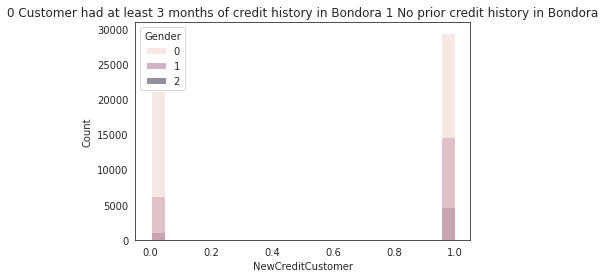

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
sns.histplot(data=info_plus,x=info_plus['NewCreditCustomer'],hue=info_plus['Gender'])
plt.title("0 Customer had at least 3 months of credit history in Bondora 1 No prior credit history in Bondora")
plt.show()
plt.figure(figsize=(12,4))

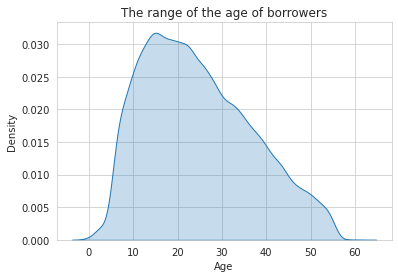

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

In [47]:
sns.set_style("whitegrid")
sns.kdeplot(data=info_plus,x='Age',fill=True)
plt.title("The range of the age of borrowers")
plt.show()
plt.figure(figsize=(12,4))

In [48]:
info_plus.columns

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'NewCreditCustomer',
       'VerificationType', 'LanguageCode', 'Age', 'Gender', 'Country',
       'AppliedAmount', 'Amount', 'Interest', 'LoanDuration', 'MonthlyPayment',
       'County', 'City', 'UseOfLoan', 'Education', 'MaritalStatus',
       'EmploymentStatus', 'EmploymentDurationCurrentEmployer',
       'OccupationArea', 'HomeOwnershipType', 'IncomeTotal',
       'ExistingLiabilities', 'LiabilitiesTotal', 'RefinanceLiabilities',
       'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay', 'Rating',
       'Restructured', 'CreditScoreEsMicroL', 'PrincipalPaymentsMade',
       'InterestAndPenaltyPaymentsMade', 'PrincipalBalance',
       'InterestAndPenaltyBalance', 'NoOfPreviousLoansBeforeLoan',
       'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'DefaultLoan'],
      dtype='object')

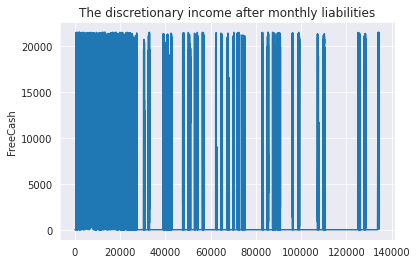

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

In [49]:
sns.set_style("darkgrid")
sns.lineplot(data=info_plus['FreeCash'])
plt.title("The discretionary income after monthly liabilities")
plt.show()
plt.figure(figsize=(12,4))

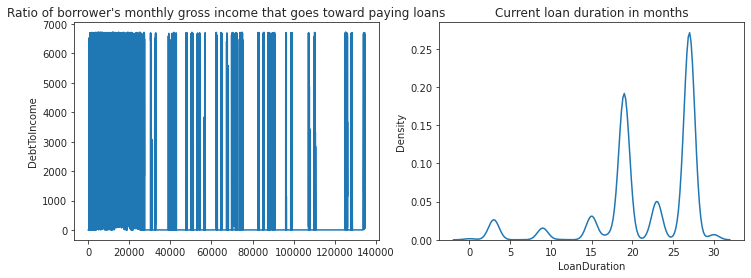

In [50]:
sns.set_style("ticks")
fig2,ax2  = plt.subplots(1,2,figsize=(12,4))
sns.lineplot(data=info_plus['DebtToIncome'],ax=ax2[0])
ax2[0].set_title("Ratio of borrower's monthly gross income that goes toward paying loans")
sns.kdeplot(data=info_plus['LoanDuration'],ax=ax2[1])
ax2[1].set_title("Current loan duration in months")
plt.show()

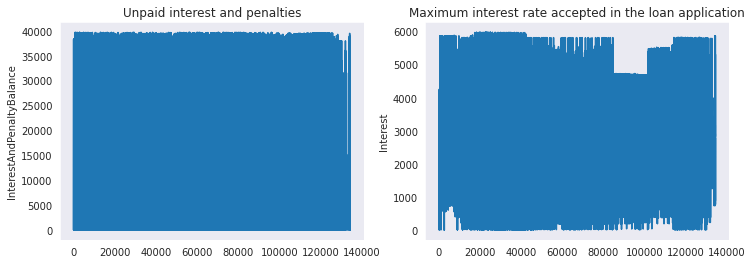

In [51]:
sns.set_style("dark")
fig,ax = plt.subplots(1,2,figsize=(12,4))
sns.lineplot(data=info_plus['InterestAndPenaltyBalance'],ax=ax[0])
ax[0].set_title("Unpaid interest and penalties")
sns.lineplot(data=info_plus['Interest'],ax=ax[1])
ax[1].set_title("Maximum interest rate accepted in the loan application")
plt.show()

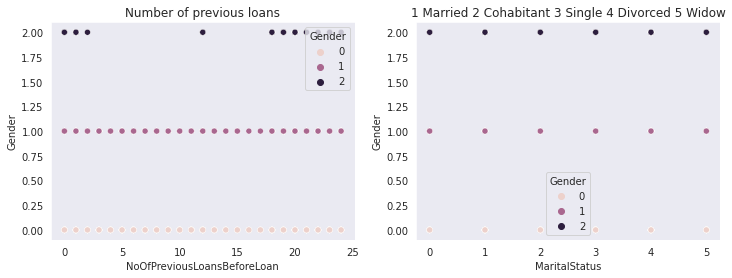

In [52]:
sns.set_style("dark")
fig3,ax3 = plt.subplots(1,2,figsize=(12,4))
sns.scatterplot(x=info_plus['NoOfPreviousLoansBeforeLoan'],y=info_plus['Gender'],ax=ax3[0],hue=info_plus['Gender'])
ax3[0].set_title("Number of previous loans")
sns.scatterplot(x=info_plus['MaritalStatus'],y=info_plus['Gender'],ax=ax3[1],hue=info_plus['Gender'])
ax3[1].set_title("1 Married 2 Cohabitant 3 Single 4 Divorced 5 Widow")
plt.show()

# Feature Engineering 


**Mutual Information**

In [53]:
from sklearn.feature_selection import mutual_info_regression

X = info_plus.copy()
y = X.pop("DefaultLoan")
discrete_features=X.dtypes==int

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores

PrincipalPaymentsMade                     1.420028
InterestAndPenaltyPaymentsMade            0.965733
MonthlyPayment                            0.861990
PrincipalBalance                          0.787152
InterestAndPenaltyBalance                 0.765736
DebtToIncome                              0.574453
PreviousRepaymentsBeforeLoan              0.466126
City                                      0.410045
LiabilitiesTotal                          0.376296
FreeCash                                  0.344229
Interest                                  0.343521
BidsPortfolioManager                      0.278070
Amount                                    0.233391
IncomeTotal                               0.208091
BidsManual                                0.136004
AmountOfPreviousLoansBeforeLoan           0.135194
County                                    0.080525
AppliedAmount                             0.044174
BidsApi                                   0.030120
Country                        

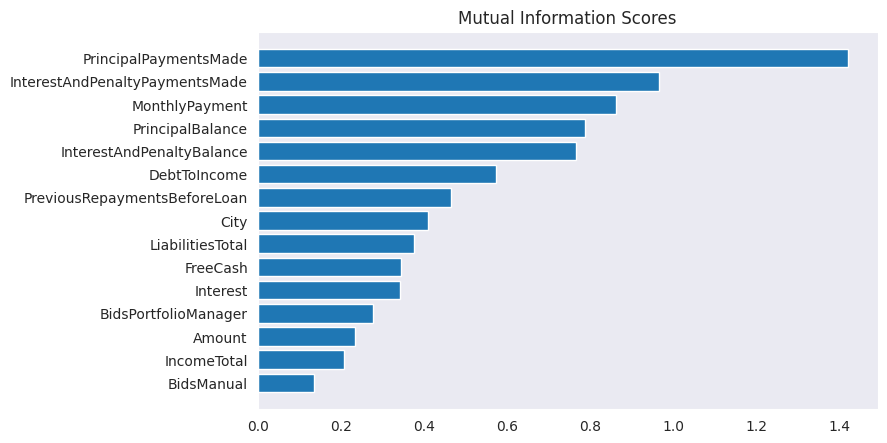

In [54]:
import matplotlib.pyplot as plt

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)

    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores[:15])

**Storing the important features resulted from the mutual information**

In [55]:
the_most_important_cols=["PrincipalPaymentsMade",
"InterestAndPenaltyPaymentsMade",
"MonthlyPayment",
"PrincipalBalance",
"InterestAndPenaltyBalance",
"DebtToIncome",
"PreviousRepaymentsBeforeLoan",
"City",
"LiabilitiesTotal",
"Interest",
"FreeCash",
"BidsPortfolioManager",
"Amount",
"IncomeTotal",
"BidsManual"]

**Clustering**

In [56]:
! pip install cluster

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
from sklearn.cluster import KMeans
features=info_plus.loc[:,["LanguageCode","BidsPortfolioManager"]]
kmeans=KMeans(n_clusters=6)
features["Cluster"]=kmeans.fit_predict(features)
features["Cluster"]=features["Cluster"].astype("category")
features

,LanguageCode,BidsPortfolioManager,Cluster
0,0,0,4
1,0,0,4
2,0,0,4
3,0,0,4
4,0,0,4
...,...,...,...
134524,8,845,1
134525,8,70,4
134526,8,186,4
134527,0,21,4


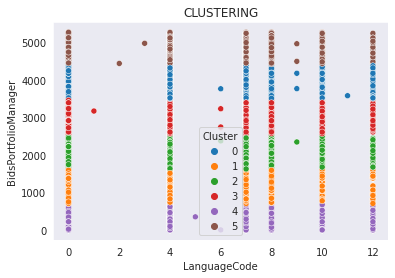

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("dark")
sns.scatterplot(x=info_plus["LanguageCode"],y=info_plus["BidsPortfolioManager"],hue=features["Cluster"])
plt.title("CLUSTERING")
plt.show()

# Modeling Part

**Gradient Boosting**

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

y=info_plus.DefaultLoan
X=info_plus.drop("DefaultLoan",axis=1)
X_train,X_val,y_train,y_val=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=1)
GB_model=GradientBoostingClassifier(n_estimators=100,max_depth=2,learning_rate=1,random_state=0)
GB_model.fit(X_train,y_train)
prediction=GB_model.predict(X_val)
accuracy=metrics.accuracy_score(y_val,prediction)
print("The accuracy after applying the gradient boosting classifier will be {}%".format(accuracy*100))
print(metrics.classification_report(y_val,prediction))

The accuracy after applying the gradient boosting classifier will be 86.66580528457911%
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      6892
           1       0.89      0.87      0.88      8587

    accuracy                           0.87     15479
   macro avg       0.86      0.87      0.87     15479
weighted avg       0.87      0.87      0.87     15479



In [85]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

y=info_plus.DefaultLoan
X=info_plus.loc[:,the_most_important_cols]
sc=StandardScaler()
X=sc.fit_transform(X)
X_train,X_val,y_train,y_val=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=1)
imp_GB_model=GradientBoostingClassifier(n_estimators=100,max_depth=2,learning_rate=1,random_state=0)
imp_GB_model.fit(X_train,y_train)
prediction=imp_GB_model.predict(X_val)
accuracy=metrics.accuracy_score(y_val,prediction)
print("The accuracy after applying the gradient boosting classifier will be {}%".format(accuracy*100))
print(metrics.classification_report(y_val,prediction))

The accuracy after applying the gradient boosting classifier will be 86.3427870017443%
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      6892
           1       0.89      0.86      0.88      8587

    accuracy                           0.86     15479
   macro avg       0.86      0.86      0.86     15479
weighted avg       0.86      0.86      0.86     15479



**Support Vector Machine (SVM)**

In [86]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.preprocessing import StandardScaler

y=info_plus.DefaultLoan
X=info_plus.loc[:,the_most_important_cols]
sc=StandardScaler()
X=sc.fit_transform(X)
X_train,X_val,y_train,y_val=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=1)
imp_SVM_model=svm.SVC(kernel="linear")
imp_SVM_model.fit(X_train,y_train)
prediction=imp_SVM_model.predict(X_val)
accuracy=metrics.accuracy_score(y_val,prediction)
print("The accuracy after applying the SVM will be {}%".format(accuracy*100))
print(metrics.classification_report(y_val,prediction))

The accuracy after applying the SVM will be 78.83584210866334%
              precision    recall  f1-score   support

           0       0.76      0.77      0.76      6892
           1       0.81      0.80      0.81      8587

    accuracy                           0.79     15479
   macro avg       0.79      0.79      0.79     15479
weighted avg       0.79      0.79      0.79     15479



In [87]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.preprocessing import StandardScaler

y=info_plus.DefaultLoan
X=info_plus.drop("DefaultLoan",axis=1)
sc=StandardScaler()
X=sc.fit_transform(X)
X_train,X_val,y_train,y_val=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=1)
SVM_model=svm.SVC(kernel="linear")
SVM_model.fit(X_train,y_train)
prediction=SVM_model.predict(X_val)
accuracy=metrics.accuracy_score(y_val,prediction)
print("The accuracy after applying the SVM will be {}%".format(accuracy*100))
print(metrics.classification_report(y_val,prediction))

The accuracy after applying the SVM will be 79.95994573292849%
              precision    recall  f1-score   support

           0       0.78      0.77      0.77      6892
           1       0.82      0.82      0.82      8587

    accuracy                           0.80     15479
   macro avg       0.80      0.80      0.80     15479
weighted avg       0.80      0.80      0.80     15479



# **Model Deployment**

***We will now extract three important values (min,max,mean) from each column resulted from the mutual information graph to use them on our web application as user parameters information.***

In [ ]:
info_plus['BidsPortfolioManager'].agg(['max','min','mean'])

max     5276.000000
min        0.000000
mean    2468.209034
Name: BidsPortfolioManager, dtype: float64

In [64]:
info_plus['Amount'].agg(['max','min','mean'])

max     4776.00000
min        0.00000
mean    2267.90768
Name: Amount, dtype: float64

In [ ]:
info_plus['Interest'].agg(['max','min','mean'])

max     5980.000000
min        0.000000
mean    2908.409915
Name: Interest, dtype: float64

In [63]:
info_plus['AppliedAmount'].agg(['max','min','mean'])

max     562.000000
min       0.000000
mean    232.663863
Name: AppliedAmount, dtype: float64

In [ ]:
info_plus['PreviousRepaymentsBeforeLoan'].agg(['max','min','mean'])

max     26749.000000
min         0.000000
mean     8391.363465
Name: PreviousRepaymentsBeforeLoan, dtype: float64

In [ ]:
info_plus['InterestAndPenaltyBalance'].agg(['max','min','mean'])

max     39707.000000
min         0.000000
mean    11766.923366
Name: InterestAndPenaltyBalance, dtype: float64

In [ ]:
info_plus['InterestAndPenaltyPaymentsMade'].agg(['max','min','mean'])

max     48468.000000
min         0.000000
mean    20624.141445
Name: InterestAndPenaltyPaymentsMade, dtype: float64

In [ ]:
info_plus['PrincipalPaymentsMade'].agg(['max','min','mean'])

max     31989.000000
min         0.000000
mean    14304.892188
Name: PrincipalPaymentsMade, dtype: float64

In [ ]:
info_plus['PrincipalBalance'].agg(['max','min','mean'])

max     33979.000000
min         0.000000
mean    10084.519614
Name: PrincipalBalance, dtype: float64

In [ ]:
info_plus['MonthlyPayment'].agg(['max','min','mean'])

max     21333.000000
min         0.000000
mean     8744.961522
Name: MonthlyPayment, dtype: float64